# Matrices

Matrices are a neat way of organizing data for use in linear operations.

An $ n \times k $ matrix is a rectangular array $ A $ of numbers with $ n $ rows and $ k $ columns:

$$
A =
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
$$

Often, the numbers in the matrix represent things in the real world like

- coefficients in a system of equations.

- rows being observations, columns being attributes of these observations (a dataframe)

For obvious reasons, the matrix $ A $ is also called a vector if either $ n = 1 $ or $ k = 1 $.

In the former case, $ A $ is called a *row vector*, while in the latter it is called a *column vector*.

If $ n = k $, then $ A $ is called *square*.

The matrix formed by replacing $ a_{ij} $ by $ a_{ji} $ for every $ i $ and $ j $ is called the *transpose* of $ A $ and denoted $ A' $ or $ A^{\top} $.

If $ A = A' $, then $ A $ is called *symmetric*.

For a square matrix $ A $, the $ i $ elements of the form $ a_{ii} $ for $ i=1,\ldots,n $ are called the *principal diagonal*.

$ A $ is called *diagonal* if the only nonzero entries are on the principal diagonal.

If, in addition to being diagonal, each element along the principal diagonal is equal to 1, then $ A $ is called the *identity matrix* and denoted by $ I $.

### Matrix Operations

Just as was the case for vectors, a number of algebraic operations are defined for matrices.

Scalar multiplication and addition are immediate generalizations of the vector case:

$$
\gamma A =
\gamma
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk}
\end{bmatrix}
$$

and

$$
A + B =
\begin{bmatrix}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk}
\end{bmatrix} +
\begin{bmatrix}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk}
\end{bmatrix} :=
\begin{bmatrix}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk}
\end{bmatrix}
$$

In the latter case, the matrices must have the same shape in order for the definition to make sense.

# Multiplication

We also have a convention for *multiplying* two matrices.

The rule for matrix multiplication generalizes the idea of dot products discussed in vector algebra
and is designed to make multiplication play well with basic linear operations.

If $ A $ and $ B $ are two matrices, then their product $ A B $ is formed by taking as its
$ i,j $-th element the dot product of the $ i $-th row of $ A $ and the
$ j $-th column of $ B $.

The [Wikipedia page](https://en.wikipedia.org/wiki/Matrix_multiplication) can help sort it, as well as this diagram:

![](../assets/matrix_dot.png)

If $ A $ is $ n \times k $ and $ B $ is $ j \times m $, then
to multiply $ A $ and $ B $ we require $ k = j $, and the
resulting matrix $ A B $ is $ n \times m $.

**memory trick**: Dot product is *joined on the inside dimensions* so $ n \times (k \cdot j) \times m $

As perhaps the most important special case, consider multiplying $ n \times k $ matrix $ A $ and $ k \times 1 $ column vector $ x $.

According to the preceding rule, this gives us an $ n \times 1 $ column vector


<a id='equation-la-atx'></a>
$$
A x =
\begin{bmatrix}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{bmatrix}
\begin{bmatrix}
    x_{1}  \\
    \vdots  \\
    x_{k}
\end{bmatrix} :=
\begin{bmatrix}
    a_{11} x_1 + \cdots + a_{1k} x_k \\
    \vdots \\
    a_{n1} x_1 + \cdots + a_{nk} x_k
\end{bmatrix} \tag{2}
$$

>**Note**
>
>$ A B $ and $ B A $ are not generally the same thing.

Another important special case is the identity matrix.

You should check that if $ A $ is $ n \times k $ and $ I $ is the $ k \times k $ identity matrix, then $ AI = A $.

If $ I $ is the $ n \times n $ identity matrix, then $ IA = A $.

### Matrices in NumPy

NumPy arrays are also used as matrices, and have fast, efficient functions and methods for all the standard matrix operations.

You can create them manually from tuples of tuples (or lists of lists) as follows.

In [1]:
A = [(1, 2),
     (3, 4)]

type(A)

list

In [2]:
import numpy as np

A = np.array(A)

print("shape", A.shape)
A

shape (2, 2)


array([[1, 2],
       [3, 4]])

The `shape` attribute is a tuple giving the number of rows and columns —
see [here](https://numpy.org/doc/stable/reference/generated/numpy.shape.html)
for more discussion.

To get the transpose of `A`, use `A.transpose()` or, more simply, `A.T`.

There are many convenient functions for creating common matrices (matrices of zeros,
ones, etc.) — see [here](https://numpy.org/doc/stable/user/basics.creation.html).

Since operations are performed elementwise by default, scalar multiplication and addition have very natural syntax

In [3]:
A = np.identity(3)
B = np.ones((3, 3))
2 * A

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

In [4]:
A + B

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

To multiply matrices we use the `@` symbol.

In particular, `A @ B` is matrix multiplication, whereas `A * B` is element-by-element multiplication.

See [here](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) for more discussion.


### Matrices as Maps


Each $ n \times k $ matrix $ A $ can be identified with a function $ f(x) = Ax $ that maps $ x \in \mathbb R ^k $ into $ y = Ax \in \mathbb R ^n $.

These kinds of functions have a special property: they are *linear*.

A function $ f \colon \mathbb R ^k \to \mathbb R ^n $ is called *linear* if, for all $ x, y \in \mathbb R ^k $ and all scalars $ \alpha, \beta $, we have

$$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$$

You can check that this holds for the function $ f(x) = A x + b $ when $ b $ is the zero vector and fails when $ b $ is nonzero.

In fact, it’s [known](https://en.wikipedia.org/wiki/Linear_map#Matrices) that $ f $ is linear if and *only if* there exists a matrix $ A $ such that $ f(x) = Ax $ for all $ x $.

## Motivating example: Back To Polynomials

Representing polynomials as vectors is powerful when we want to solve multiple equations at the same time. For instance if we have the following equations:

$3x + 2y - z = 1$  
$2x - 2y + 4z = -2$  
$-x + 0.5y - z = 0$  

The **solution** would be 

$$x=1; y=-2; z=-2$$

We can rearrange the problem as a matrix problem with the equations matrix on the left and the solution vector on the right:

$$
\begin{bmatrix} 
3x & 2y & -1z
\\ 2x & -2y & 4z
\\ -1x & 0.5y & -1z
\end{bmatrix}
=
\begin{bmatrix} 1\\ -2\\ 0 \end{bmatrix}
$$

Which can be rearranged as:

$$
\begin{bmatrix} 
3 & 2 & -1
\\ 2 & -2 & 4
\\ -1 & 0.5 & -1
\end{bmatrix}
\cdot
\begin{bmatrix} x\\ y\\ z \end{bmatrix}
=
\begin{bmatrix} 1\\ -2\\ 0 \end{bmatrix}
$$

One thing to note is that for $n$ equations with $n$ unknowns we can generally solve for the unknowns.

The problem we face is to determine a vector $ x \in \mathbb R ^k $ that solves the equation problem, taking $ y $ and $ A $ as given.

This is a special case of a more general problem: Find an $ x $ such that $ y = f(x) $.

Given an arbitrary function $ f $ and a $ y $, is there always an $ x $ such that $ y = f(x) $?

If so, is it always unique?

The answer to both these questions is negative, as the next figure shows

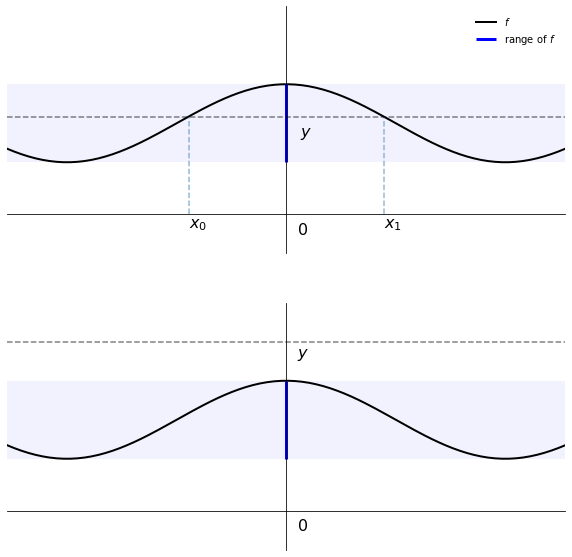

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 0.6 * np.cos(4 * x) + 1.4


xmin, xmax = -1, 1
x = np.linspace(xmin, xmax, 160)
y = f(x)
ya, yb = np.min(y), np.max(y)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

for ax in axes:
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.set(ylim=(-0.6, 3.2), xlim=(xmin, xmax),
           yticks=(), xticks=())

    ax.plot(x, y, 'k-', lw=2, label='$f$')
    ax.fill_between(x, ya, yb, facecolor='blue', alpha=0.05)
    ax.vlines([0], ya, yb, lw=3, color='blue', label='range of $f$')
    ax.text(0.04, -0.3, '$0$', fontsize=16)

ax = axes[0]

ax.legend(loc='upper right', frameon=False)
ybar = 1.5
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.05, 0.8 * ybar, '$y$', fontsize=16)
for i, z in enumerate((-0.35, 0.35)):
    ax.vlines(z, 0, f(z), linestyle='--', alpha=0.5)
    ax.text(z, -0.2, f'$x_{i}$', fontsize=16)

ax = axes[1]

ybar = 2.6
ax.plot(x, x * 0 + ybar, 'k--', alpha=0.5)
ax.text(0.04, 0.91 * ybar, '$y$', fontsize=16)

plt.show()

In the first plot, there are multiple solutions, as the function is not one-to-one, while
in the second there are no solutions, since $ y $ lies outside the range of $ f $.

Can we impose conditions on $ A $ in an equation that rule out these problems?

In this context, the most important thing to recognize about the expression
$ Ax $ is that it corresponds to a linear combination of the columns of $ A $.

In particular, if $ a_1, \ldots, a_k $ are the columns of $ A $, then

$$
Ax = x_1 a_1 + \cdots + x_k a_k
$$

Hence the range of $ f(x) = Ax $ is exactly the span of the columns of $ A $.

We want the range to be large so that it contains arbitrary $ y $.

As you might recall, the condition that we want for the span to be large is [linear independence](https://textbooks.math.gatech.edu/ila/linear-independence.html).

A happy fact is that linear independence of the columns of $ A $ also gives us uniqueness.

Indeed, it follows that if $ \{a_1, \ldots, a_k\} $ are linearly independent and $ y = Ax = x_1 a_1 + \cdots + x_k a_k $, then no $ z \not= x $ satisfies $ y = Az $.

### The Square Matrix Case

Let’s discuss some more details, starting with the case where $ A $ is $ n \times n $.

This is the familiar case where the number of unknowns equals the number of equations.

For arbitrary $ y \in \mathbb R ^n $, we hope to find a unique $ x \in \mathbb R ^n $ such that $ y = Ax $.

In view of the observations immediately above, if the columns of $ A $ are
linearly independent, then their span, and hence the range of $ f(x) =
Ax $, is all of $ \mathbb R ^n $.

Hence there always exists an $ x $ such that $ y = Ax $.

Moreover, the solution is unique.

In particular, the following are equivalent

1. The columns of $ A $ are linearly independent.  
1. For any $ y \in \mathbb R ^n $, the equation $ y = Ax $ has a unique solution.  


The property of having linearly independent columns is sometimes expressed as having *full column rank*.

#### Inverse Matrices

Can we give some sort of expression for the solution?

If $ y $ and $ A $ are scalar with $ A \not= 0 $, then the
solution is $ x = A^{-1} y $.

A similar expression is available in the matrix case.

In particular, if square matrix $ A $ has full column rank, then it possesses a multiplicative
*inverse matrix* $ A^{-1} $, with the property that $ A A^{-1} = A^{-1} A = I $.

As a consequence, if we pre-multiply both sides of $ y = Ax $ by $ A^{-1} $, we get $ x = A^{-1} y $.

This is the solution that we’re looking for.

#### Determinants

Another quick comment about square matrices is that to every such matrix we
assign a unique number called the *determinant* of the matrix — you can find
the expression for it [here](https://en.wikipedia.org/wiki/Determinant).

If the determinant of $ A $ is not zero, then we say that $ A $ is
*nonsingular*.

Perhaps the most important fact about determinants is that $ A $ is nonsingular if and only if $ A $ is of full column rank.

This gives us a useful one-number summary of whether or not a square matrix can be
inverted.

### More Rows than Columns

This is the $ n \times k $ case with $ n > k $.

This case is very important in many settings, not least in the setting of linear regression (where $ n $ is the number of observations, and $ k $ is the number of explanatory variables).

Given arbitrary $ y \in \mathbb R ^n $, we seek an $ x \in \mathbb R ^k $ such that $ y = Ax $.

In this setting, the existence of a solution is highly unlikely.

Without much loss of generality, let’s go over the intuition focusing on the case where the columns of
$ A $ are linearly independent.

It follows that the span of the columns of $ A $ is a $ k $-dimensional subspace of $ \mathbb R ^n $.

This span is very “unlikely” to contain arbitrary $ y \in \mathbb R ^n $.

Imagine an arbitrarily chosen $ y \in \mathbb R ^3 $, located somewhere in that three-dimensional space.

What’s the likelihood that $ y $ lies in the span of $ \{a_1, a_2\} $ (i.e., the two dimensional plane through these points)?

In a sense, it must be very small, since this plane has zero “thickness”.

As a result, in the $ n > k $ case we usually give up on existence.

However, we can still seek the best approximation, for example, an
$ x $ that makes the distance $ \| y - Ax\| $ as small as possible.

To solve this problem, one can use either calculus or the theory of orthogonal
projections.

The solution is known to be $ \hat x = (A'A)^{-1}A'y $ 

### More Columns than Rows

This is the $ n \times k $ case with $ n < k $, so there are fewer
equations than unknowns.

In this case there are either no solutions or infinitely many — in other words, uniqueness never holds.

For example, consider the case where $ k=3 $ and $ n=2 $.

Thus, the columns of $ A $ consists of 3 vectors in $ \mathbb R ^2 $.

This set can never be linearly independent, since it is possible to find two vectors that span
$ \mathbb R ^2 $.

(For example, use the canonical basis vectors)

It follows that one column is a linear combination of the other two.

For example, let’s say that $ a_1 = \alpha a_2 + \beta a_3 $.

Then if $ y = Ax = x_1 a_1 + x_2 a_2 + x_3 a_3 $, we can also write

$$
y
= x_1 (\alpha a_2 + \beta a_3) + x_2 a_2 + x_3 a_3
= (x_1 \alpha + x_2) a_2 + (x_1 \beta + x_3) a_3
$$

In other words, uniqueness fails.

### Linear Equations with SciPy


Here’s an example of how to solve linear equations with SciPy’s `linalg` submodule.

All of these routines are Python front ends to time-tested and highly optimized FORTRAN code

In [8]:
A = ((1, 2), (3, 4))
A = np.array(A)
y = np.ones((2, 1))  # Column vector
np.linalg.det(A)  # Check that A is nonsingular, and hence invertible

-2.0000000000000004

In [10]:
A_inv = np.linalg.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [12]:
# A_inv = inv(A)  # Compute the inverse
#A_inv

In [13]:
x = A_inv @ y  # Solution
A @ x          # Should equal y

array([[1.],
       [1.]])

In [15]:
np.linalg.solve(A, y)  # Produces the same solution

array([[-1.],
       [ 1.]])

Observe how we can solve for $ x = A^{-1} y $ by either via `inv(A) @ y`, or using `solve(A, y)`.

The latter method uses a different algorithm (LU decomposition) that is numerically more stable, and hence should almost always be preferred.

To obtain the least-squares solution $ \hat x = (A'A)^{-1}A'y $, use `scipy.linalg.lstsq(A, y)`.


# Some Mathematical Properties

We round out our discussion by briefly mentioning several other important
topics.

### Series Expansions


Recall the usual summation formula for a geometric progression, which states
that if $ |a| < 1 $, then $ \sum_{k=0}^{\infty} a^k = (1 - a)^{-1} $.

A generalization of this idea exists in the matrix setting.

#### Matrix Norms


Let $ A $ be a square matrix, and let

$$
\| A \| := \max_{\| x \| = 1} \| A x \|
$$

The norms on the right-hand side are ordinary vector norms, while the norm on
the left-hand side is a *matrix norm* — in this case, the so-called
*spectral norm*.

For example, for a square matrix $ S $, the condition $ \| S \| < 1 $ means that $ S $ is *contractive*, in the sense that it pulls all vectors towards the origin



### Positive Definite Matrices


Let $ A $ be a symmetric $ n \times n $ matrix.

We say that $ A $ is

1. *positive definite* if $ x' A x > 0 $ for every $ x \in \mathbb R ^n \setminus \{0\} $  
1. *positive semi-definite* or *nonnegative definite* if $ x' A x \geq 0 $ for every $ x \in \mathbb R ^n $  


Analogous definitions exist for negative definite and negative semi-definite matrices.

It is notable that if $ A $ is positive definite, then all of its eigenvalues
are strictly positive, and hence $ A $ is invertible (with positive
definite inverse).


In [7]:
# datasciencecourse.org/notes/matrices